# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
# importando todos os pacotes
import pandas as pd

import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import r2_score

In [3]:
# 1.

# Carregando a base de dados
tips = sns.load_dataset("tips")

#Criando a variável tip_pct - % da Gorjeta em Relação ao Valor Líquido da Conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criando a variável net_bill - Valor Líquido da Conta
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
# Definindo Matriz de Design


y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', data=tips, return_type='dataframe')
X

,Intercept,sex[T.Female],smoker[T.No],time[T.Dinner],net_bill
0,1.0,1.0,1.0,1.0,15.98
1,1.0,0.0,1.0,1.0,8.68
2,1.0,0.0,1.0,1.0,17.51
3,1.0,0.0,1.0,1.0,20.37
4,1.0,1.0,1.0,1.0,20.98
...,...,...,...,...,...
239,1.0,0.0,1.0,1.0,23.11
240,1.0,1.0,0.0,1.0,25.18
241,1.0,0.0,0.0,1.0,20.67
242,1.0,0.0,1.0,1.0,16.07


In [5]:
# 2.

# Ajustando o modelo de Regressão
modelo = sm.OLS(y,X).fit()

# Verificando Sumário do Modelo para Analisar a Significancia Estatística das Variáveis
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           2.64e-20
Time:                        20:06:30   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Removendo as variáveis não significantes
y, X = patsy.dmatrices('tip ~ net_bill', data=tips, return_type='dataframe')

modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           5.02e-23
Time:                        20:06:30   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

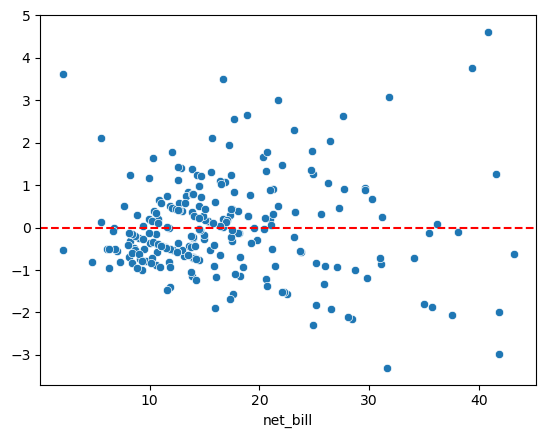

In [7]:
# 3.

# Analisando resíduos no scatterplot

sns.scatterplot(x = 'net_bill', y = modelo.resid, data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [8]:
# 4.

# Ajustando o Modelo de Regressão com net_bill Transformado no log

y_log, X_log = patsy.dmatrices('tip ~ np.log(net_bill) + 1', data=tips, return_type='dataframe')

modelo_log = sm.OLS(y_log,X_log).fit()

modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           4.40e-20
Time:                        20:06:31   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Ajustando Modelo de Regressão com net_bill Transformado em um Polinômio

y_poli, X_poli = patsy.dmatrices('tip ~ np.power(net_bill,2) + 1', data=tips, return_type='dataframe')

modelo_poli = sm.OLS(y_poli,X_poli).fit()

modelo_poli.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.47e-20
Time:                        20:06:31   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Após análise, ambos os modelos ficaram com R² abaixo do modelo original, mas o que mais se aproximou ao modelo original foi o modelo com a transformação de net_bill em polinômio

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
# 1.

# Criando novo conjunto de dados

novo_tips = tips

#Criando a variável tip_pct - % da Gorjeta em Relação ao Valor Líquido da Conta
novo_tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criando a variável net_bill - Valor Líquido da Conta
novo_tips['net_bill'] = tips['total_bill'] - tips['tip']

novo_tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [11]:
# Definindo Matriz de Design no log de tip


y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', data=novo_tips, return_type='dataframe')

In [12]:
# Ajustando o modelo de Regressão
modelo_novo = sm.OLS(y,X).fit()

# Verificando Sumário do Modelo para Analisar a Significancia Estatística das Variáveis
modelo_novo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.21e-18
Time:                        20:06:31   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Removendo as variáveis não significantes

y, X = patsy.dmatrices('np.log(tip) ~ net_bill', data=novo_tips, return_type='dataframe')

modelo_novo = sm.OLS(y,X).fit()

modelo_novo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           2.60e-21
Time:                        20:06:31   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

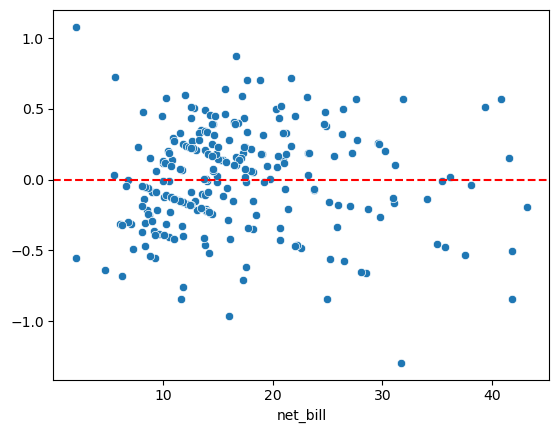

In [14]:
# 3.

# Analisando resíduos no scatterplot

sns.scatterplot(x = 'net_bill', y = modelo_novo.resid, data = novo_tips)
plt.axhline(y=0, color='r', linestyle='--')

In [24]:
# 4.

# Ajustando o Modelo com net_bill Transformado no log

y_log, X_log = patsy.dmatrices('tip ~ np.log(net_bill) + 1', data=novo_tips, return_type='dataframe')

modelo_novo_log = sm.OLS(y_log,X_log).fit()

modelo_novo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           4.40e-20
Time:                        20:19:14   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Ajustando Modelo com net_bill Transformado em um Polinômio

y_poli, X_poli = patsy.dmatrices('tip ~ np.power(net_bill,2) + 1', data=novo_tips, return_type='dataframe')

modelo_novo_poli = sm.OLS(y_poli,X_poli).fit()

modelo_novo_poli.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.47e-20
Time:                        20:07:37   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# 5.

# R² na escala original (sem log) - Modelo do item 1
R_quad_log = modelo_novo_log.rsquared
print("R² na escala original (Modelo do item 1):", R_quad_log)

# R² na escala original (sem log) - Modelo do item 2
R_quad_poly = modelo_novo_poli.rsquared
print("R² na escala original (Modelo do item 2):", R_quad_poly)

R² na escala original (Modelo do item 1): 0.2944412513792952
R² na escala original (Modelo do item 2): 0.3007320013293898


- O modelo do item 2 tem melhor coeficiente de determinação

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [30]:
#Carregando base de dados

df = pd.read_csv('previsao_de_renda.csv')

# Verificar os primeiros registros
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [46]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [40]:
# 1.
# Criando modelo de regressão simples 

reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:13:37   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

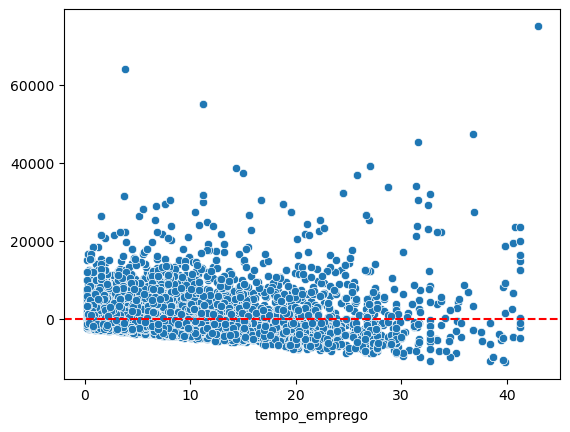

In [41]:
# 2.

# Analisando resíduos no scatterplot

sns.scatterplot(x = 'tempo_emprego', y = reg.resid, data = df)
plt.axhline(y=0, color='r', linestyle='--')

- Removendo as variáveis insignificantes e verificando se há overfitting

In [62]:
# 3.
#Criando modelo de regressão múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis

reg2 = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau', data = df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:40:13   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12440   BIC:                         2.442e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -275.6142   1675.894     -0.164      0.869   -3560.625    3009.396
sexo[T.M]                         2366.3093     88.116     26.855      0.000    2193.589    2539.030
posse_de_veiculo[T.True]           -79.2699     84.733     -0.936      0.350    -245.360      86.820
posse_de_imovel[T.True]            348.8880     83.443      4.181      0.000     185.326     512.450
tipo_renda[T.Bolsista]            -817.8078   2155.414     -0.379      0.704   -5042.752    3407.136
tipo_renda[T.Empresário]          1021.9829     90.151     11.336      0.000     845.273    1198.693
tipo_renda[T.Pensionista]         1744.5042   1458.879      1.196      0.232   -1115.124    4604.132
tipo_renda[T.Servidor público]     436.9302    130.517      3.348      0.001     181.097     692.764
educacao[T.Pós graduação]         2207.1796   1081.116      2.042      0.041      88.024    4326.335
educacao[T.Secundário]            -241.1182    437.804     -0.551      0.582   -1099.283     617.046
educacao[T.Superior completo]      338.3998    439.643      0.770      0.441    -523.369    1200.168
educacao[T.Superior incompleto]   -295.7849    471.028     -0.628      0.530   -1219.073     627.503
estado_civil[T.Separado]           144.4038    806.980      0.179      0.858   -1437.401    1726.209
estado_civil[T.Solteiro]           378.8127    792.270      0.478      0.633   -1174.159    1931.784
estado_civil[T.União]              -40.8760    143.778     -0.284      0.776    -322.703     240.951
estado_civil[T.Viúvo]              -38.3778    828.797     -0.046      0.963   -1662.949    1586.193
tipo_residencia[T.Casa]           -356.3831    328.636     -1.084      0.278   -1000.561     287.795
tipo_residencia[T.Com os pais]    -641.1830    368.536     -1.740      0.082   -1363.571      81.204
tipo_residencia[T.Comunitário]    -577.9834    634.095     -0.912      0.362   -1820.907     664.940
tipo_residencia[T.Estúdio]        -976.1533    547.375     -1.783      0.075   -2049.093      96.786
tipo_residencia[T.Governamental]  -883.4601    397.305     -2.224      0.026   -1662.240    -104.680
mau[T.True]                        -19.3616    255.885     -0.076      0.940    -520.935     482.212
qtd_filhos                        -242.7458    790.085     -0.307      0.759   -1791.435    1305.943
idade                               29.8762      4.808      6.213      0.000      20.451      39.301
tempo_emprego                      299.3139      6.146     48.700      0.000     287.267     311.361
qt_pessoas_residencia              308.7311    788.615      0.391      0.695   -1237.077    1854.539
==============================================================================
Omnibus:                    10075.338   Durbin-Watson:                   2.

In [63]:
# 4.
# Removendo variáveis irrelevantes

reg2 = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego', data = df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     907.7
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:40:23   Log-Likelihood:                -13335.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12461   BIC:                         2.672e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.3732      0.030    243.856      0.000       7.314       7.432
sexo[T.M]                   0.4742      0.013     35.424      0.000       0.448       0.500
posse_de_imovel[T.True]     0.1018      0.013      7.649      0.000       0.076       0.128
idade                       0.0043      0.001      5.958      0.000       0.003       0.006
tempo_emprego               0.0479      0.001     48.283      0.000       0.046       0.050
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.272
Skew:                           0.011   Prob(JB):                        0.529
Kurtosis:                       3.045   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
reg2.params

Intercept                  7.373219
sexo[T.M]                  0.474171
posse_de_imovel[T.True]    0.101842
idade                      0.004287
tempo_emprego              0.047850
dtype: float64

- posse_de_imovel: Para cada cliente que possui um imóvel, a variável dependente aumenta em média 0.101842 unidades, desde que todas as outras variáveis sejam mantidas constantes, o que pode segurir que possuir um imóvel pode ter um impacto positivo na pontuação de crédito ou na avaliação de risco de crédito.

- idade: para cada aumento de um ano na idade do cliente, a variável dependente aumenta em média 0.004287 unidades, sugerindo que a idade do cliente pode ter uma influência positiva na pontuação de crédito.

- tempo_emprego: Para cada aumento de uma unidade no tempo que o cliente está no emprego atual, a variável dependente aumenta em média 0.047850 unidades, o que pode sugerir que o tempo de emprego atual pode ter uma influência positiva na pontuação de crédito.

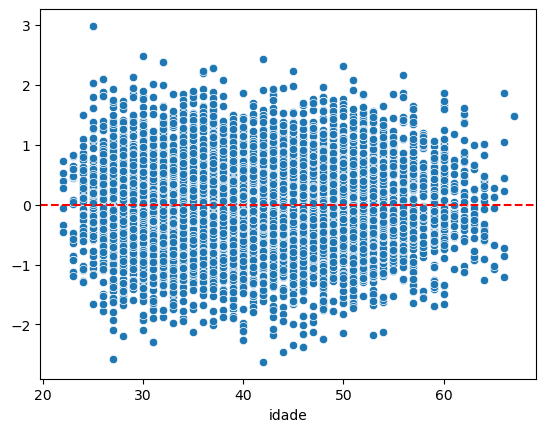

In [67]:
sns.scatterplot(x = 'idade', y = reg2.resid, data = df)
plt.axhline(y=0, color='r', linestyle='--')

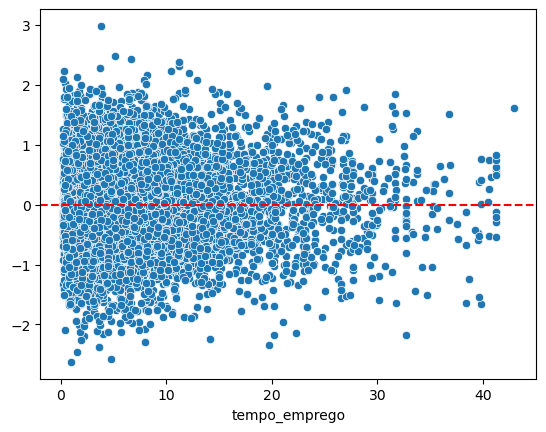

In [71]:
sns.scatterplot(x = 'tempo_emprego', y = reg2.resid, data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sexo'>

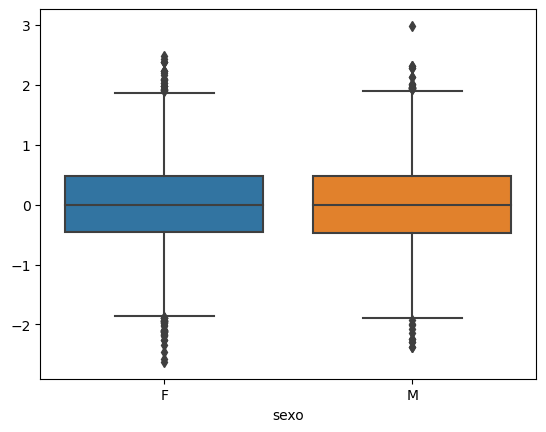

In [70]:
sns.boxplot(x = 'sexo', y = reg2.resid, data = df)

<Axes: xlabel='posse_de_imovel'>

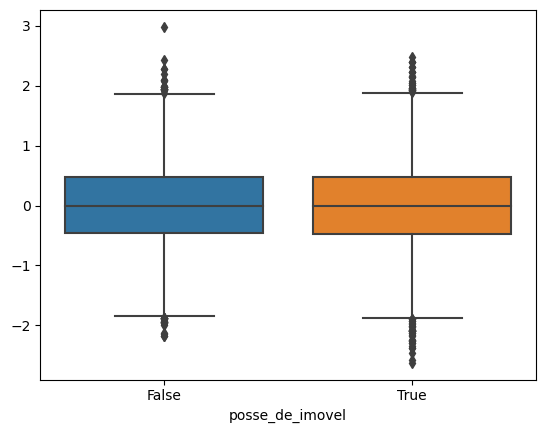

In [72]:
sns.boxplot(x = 'posse_de_imovel', y = reg2.resid, data = df)

- Acredito que esse modelo não seja o melhor modelo para essa representação de dados porque há um padrão de variância constante.